In [29]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


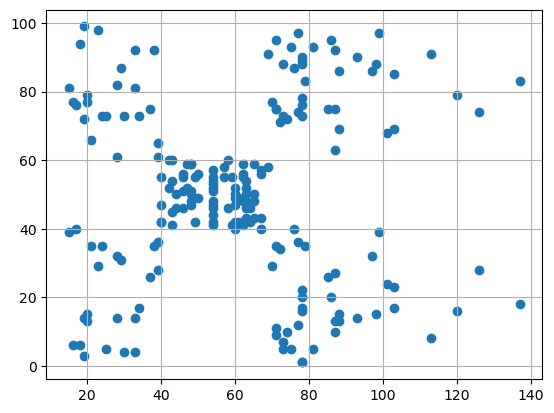

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.grid(True)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.show()

In [31]:
# Combine x and y into a single DataFrame for splitting
data = pd.DataFrame({'Annual Income': x, 'Spending Score': y})

# Split the data into train and test sets
train_data, test_data = train_test_split(data, random_state=24, test_size=0.3, shuffle=True)

# Define the number of clusters
k = 5

# Initialize clusters
clusters = {}

# Set the random seed for reproducibility
np.random.seed(23)

# Initialize cluster centers within the range of data
for i in range(k):
    center = [np.random.uniform(train_data['Annual Income'].min(), train_data['Annual Income'].max()), 
              np.random.uniform(train_data['Spending Score'].min(), train_data['Spending Score'].max())]
    clusters[i] = {
        'center': center,
        'points': []
    }

print(clusters)

{0: {'center': [78.1103418292839, 91.90840996622215], 'points': []}, 1: {'center': [108.38609064642264, 28.11000102084282], 'points': []}, 2: {'center': [41.96753431792162, 66.87732018279682], 'points': []}, 3: {'center': [35.39098277820686, 38.67447678064295], 'points': []}, 4: {'center': [90.40238636484273, 40.54528910643961], 'points': []}}


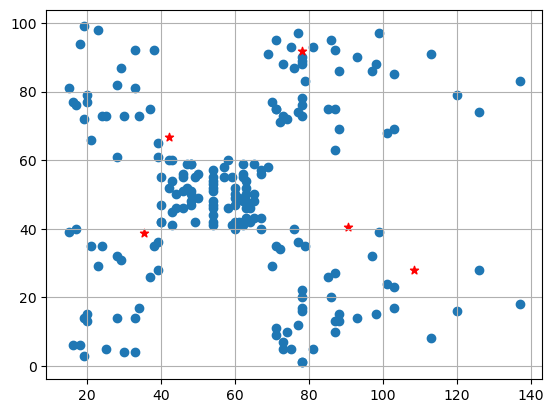

In [33]:
plt.scatter(x,y)
plt.grid(True)
for i in clusters: 
    center = clusters[i]['center']
    plt.scatter(center[0],center[1], marker = '*', c = 'red')
plt.show()

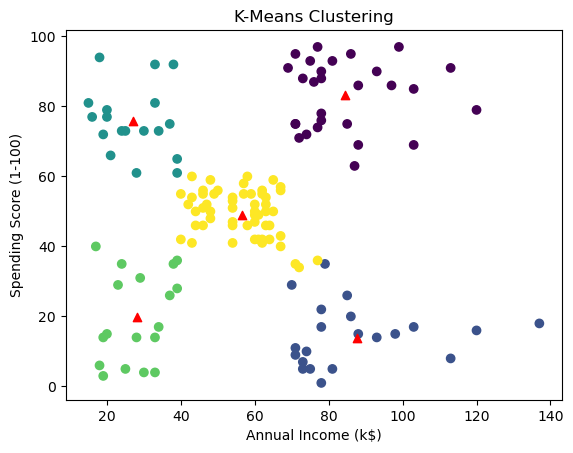

In [39]:

# Define the distance function
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Implementing the E-step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

# Implementing the M-Step
def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
        clusters[i]['points'] = []
    return clusters

# Predict cluster for each point
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

# Converting training data to numpy array
X = train_data.to_numpy()

# Iterating until convergence (you can set a max number of iterations or a convergence threshold)
for _ in range(10):  # Let's run for 10 iterations for simplicity
    clusters = assign_clusters(X, clusters)
    clusters = update_clusters(clusters)

# Predicting the clusters
pred = pred_cluster(X, clusters)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()
